In [25]:
from cartes.osm import Overpass
import logging

logging.getLogger().setLevel(logging.INFO)

INFO:root:area called with geom=True
INFO:root:nwr called with geom=True
INFO:root:area called with geom=True
INFO:root:nwr called with geom=True
INFO:root:area called with geom=True
INFO:root:nwr called with geom=True
INFO:root:area called with geom=True
INFO:root:nwr called with geom=True
INFO:root:area called with geom=True
INFO:root:nwr called with geom=True
INFO:root:area called with geom=True
INFO:root:nwr called with geom=True


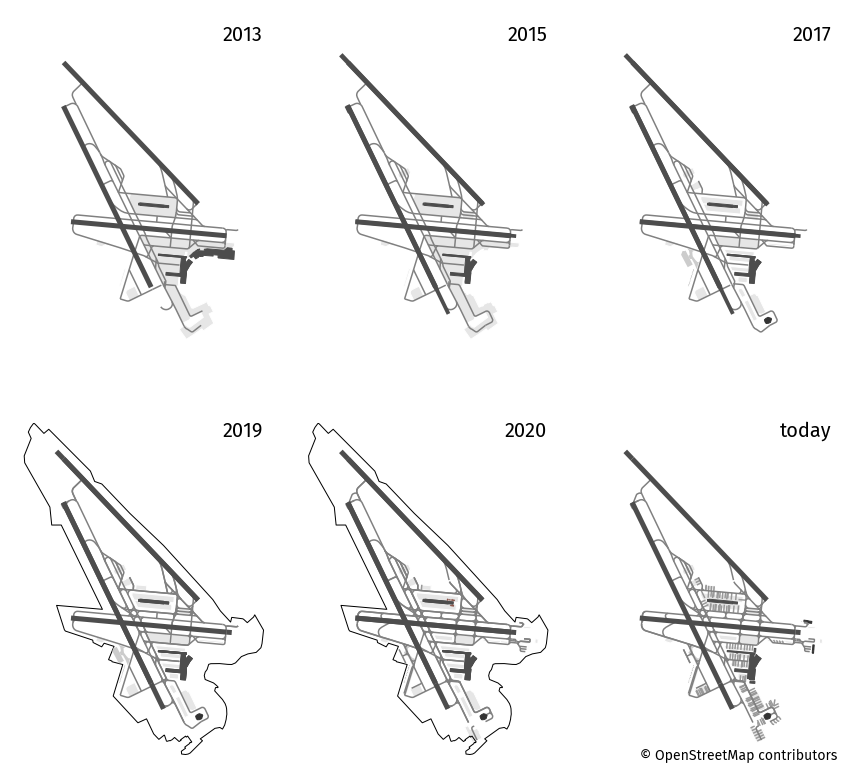

In [64]:
from cartes.crs import CH1903p
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(2, 3, figsize=(12, 12), subplot_kw=dict(projection=CH1903p()))

ax_iter = iter(reversed(ax.ravel()))
ax_ = next(ax_iter)

lszh = Overpass.request(area=dict(icao="LSZH"), nwr=dict(aeroway=True))
lszh.plot(ax_, by='aeroway')
ax_.spines["geo"].set_visible(False)

text = AnchoredText(
    "today",
    loc=1,
    frameon=False,
    prop={"size": 20, "fontname": "Fira Sans"},
)
ax_.add_artist(text)
ax_.set_extent((8.524127533735435, 8.581621552217376, 47.43629613734689, 47.48973460476072))

for ax_, year in zip(ax_iter, ["2020", "2019", "2017", "2015", "2013", #"2011"
                              ]):
    lszh = Overpass.request(date=f"{year}-01-01T00:00:00Z", area=dict(icao="LSZH"), nwr=dict(aeroway=True))
    lszh.plot(ax_, by='aeroway')
    ax_.spines["geo"].set_visible(False)

    text = AnchoredText(
        year,
        loc=1,
        frameon=False,
        prop={"size": 20, "fontname": "Fira Sans"},
    )
    ax_.add_artist(text)
    ax_.set_extent((8.524127533735435, 8.581621552217376, 47.43629613734689, 47.48973460476072))

text = AnchoredText(
        "© OpenStreetMap contributors",
        loc=4,
        frameon=False,
        prop={"size": 14, "fontname": "Fira Sans"},
    )
ax[1, 2].add_artist(text)

fig.set_tight_layout(True)
fig.subplots_adjust(wspace=0.05, hspace=0)
fig.savefig("challenge_day5.png", dpi=300, facecolor='white')